In [1]:
#Importing imp packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

In [2]:
#Reading of data and previewing it
train_file_path= 'D:\\Studies\\Fourth Semester\\Autonomous Systems A\\ML model\\Data\\Train_data.csv'
test_file_path = 'D:/Studies/Fourth Semester/Autonomous Systems A/ML model/Data/corrected.gz'
X = pd.read_csv(train_file_path)
#print all features
print(X.iloc[:0])


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Studies\\Fourth Semester\\Autonomous Systems A\\ML model\\Data\\Train_data.csv'

In [ ]:

#later for further testing. 
'''
import gzip
# Strip newlines and make a DataFrame
with gzip.open(test_file_path, 'rt') as f:
    rows = [line.strip().split(',') for line in f]

# Convert to DataFrame
df = pd.DataFrame(rows)

# Get the last column
y_test = df.iloc[:, -1]
df.drop(df.columns[-1], axis=1, inplace=True)

print(y_test.head())
df.drop(df.columns[-1], axis=1, inplace=True)

'''

In [ ]:
#Manually analysing the data
print(X.describe())


In [ ]:
always_zero_features= ['num_outbound_cmds', 'is_host_login']

In [ ]:
#check dataset distribution and null values
X.drop(always_zero_features, axis=1, inplace=True)
print(X['class'].value_counts())
print(X.isnull().sum())



normal     13449
anomaly    11743
Name: class, dtype: int64
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_ra

In [ ]:
#Checking for duplicate rows
'''
initial_row_count = len(X)
X.drop_duplicates(inplace=True)
final_row_count = len(X)
dropped_rows = initial_row_count - final_row_count
X.reset_index(drop=True, inplace=True)
print(f"Number of rows dropped: {dropped_rows}")
'''

In [ ]:
#removing categorical columns for first model training
y= X['class']
X.drop('class', axis=1, inplace=True)


In [ ]:

categorical_cols=X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['protocol_type', 'service', 'flag'], dtype='object')


In [ ]:
#Hot endcoding categorical features
encoder = OneHotEncoder(sparse=False) 
encoded_categories = encoder.fit_transform(X[['protocol_type', 'service','flag']])


encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['protocol_type', 'service','flag']))

X_copy = X.copy()

# Drop the columns and concatenate
X_copy.drop(columns=['protocol_type', 'service', 'flag'], inplace=True)
X_full = pd.concat([X_copy, encoded_df], axis=1)




In [ ]:

print(X_full.columns)





Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=116)


In [ ]:


#X_reduced=data_encoded.drop(always_zero_features, axis=1,inplace=True)



In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded= pd.DataFrame(y_encoded, index=y.index, columns=['class'])

In [ ]:
#Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_encoded, train_size=0.8, test_size=0.2,
                                                      random_state=0)





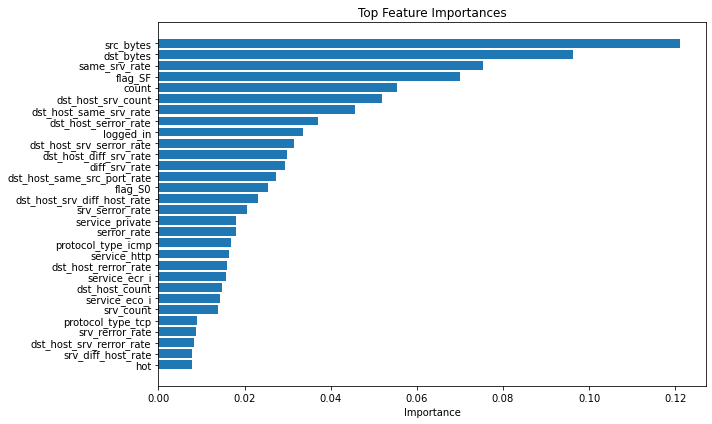

In [ ]:

rf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=10,              # limit tree depth to avoid overfitting
    min_samples_split=10,      # require more samples to split
    min_samples_leaf=5,        # require more samples per leaf
    max_features='sqrt',       # fewer features per split
    random_state=42
)
rf.fit(X_train, y_train.values.ravel())

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a pandas DataFrame for importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

top_n = 30
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.barh(feature_importance_df['feature'][:top_n][::-1], feature_importance_df['importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [ ]:

#Getting Model accuracy
y_pred_pretest = rf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_pretest)
print(classification_report(y_valid, y_pred_pretest))
print(f"Model accuracy: {accuracy:.2f}")



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2326
           1       0.99      1.00      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Model accuracy: 0.99


<AxesSubplot:xlabel='class', ylabel='src_bytes'>

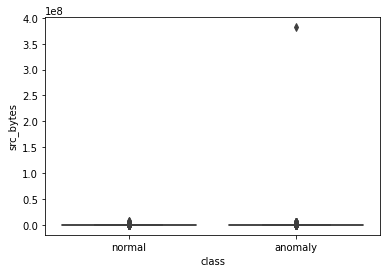

In [ ]:
#dropping the least important features

threshold = 0.01
important_features = feature_importance_df[feature_importance_df['importance'] > threshold]['feature']
X_reduced = X_full[important_features]


#Finding correlation of Src_bytes with the target variable
import seaborn as sns
sns.boxplot(x=y, y=X['src_bytes'])


In [ ]:
X_reduced.shape

(25192, 25)

In [ ]:
# Experimenting with Variables (will be optimized later)
X_train, X_valid, y_train, y_valid = train_test_split(X_reduced, y_encoded, train_size=0.8, test_size=0.2,
                                                      random_state=0)

model_1 = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=10,              # limit tree depth to avoid overfitting
    min_samples_split=10,      # require more samples to split
    min_samples_leaf=5,        # require more samples per leaf
    max_features='sqrt',       # fewer features per split
    random_state=42
)
print(X_train.columns)
print(X_train.shape)

Index(['src_bytes', 'dst_bytes', 'same_srv_rate', 'flag_SF', 'count',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'logged_in', 'dst_host_srv_serror_rate', 'dst_host_diff_srv_rate',
       'diff_srv_rate', 'dst_host_same_src_port_rate', 'flag_S0',
       'dst_host_srv_diff_host_rate', 'srv_serror_rate', 'service_private',
       'serror_rate', 'protocol_type_icmp', 'service_http',
       'dst_host_rerror_rate', 'service_ecr_i', 'dst_host_count',
       'service_eco_i', 'srv_count'],
      dtype='object')
(20153, 25)


In [ ]:
model_1.fit(X_train, y_train.values.ravel())    
preds = model_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, preds))
print(classification_report(y_valid, preds))


scores = cross_val_score(model_1, X_reduced, y, cv=10)
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")
print(scores)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, preds))


Accuracy: 0.9940464377852749
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2326
           1       0.99      1.00      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Mean accuracy: 0.9947205208668091
Standard deviation: 0.001292993427284132
[0.99325397 0.9968254  0.99483922 0.99603017 0.99285431 0.9952362
 0.99285431 0.99563319 0.99444224 0.9952362 ]
[[2303   23]
 [   7 2706]]


In [ ]:
X_with_target = pd.concat([X_train, y_train], axis=1)

# Calculate and print the correlation with the target 
correlation_matrix = X_with_target.corr()
print(correlation_matrix['class'])

src_bytes                     -0.006548
dst_bytes                      0.012021
same_srv_rate                  0.747399
flag_SF                        0.756402
count                         -0.577307
dst_host_srv_count             0.717398
dst_host_same_srv_rate         0.691323
dst_host_serror_rate          -0.649929
logged_in                      0.687917
dst_host_srv_serror_rate      -0.652926
dst_host_diff_srv_rate        -0.235283
diff_srv_rate                 -0.187112
dst_host_same_src_port_rate   -0.092096
flag_S0                       -0.649822
dst_host_srv_diff_host_rate   -0.066281
srv_serror_rate               -0.647265
service_private               -0.446260
serror_rate                   -0.649092
protocol_type_icmp            -0.199520
service_http                   0.558454
dst_host_rerror_rate          -0.257498
service_ecr_i                 -0.148029
dst_host_count                -0.367148
service_eco_i                 -0.167943
srv_count                     -0.003120


In [ ]:

##output = pd.DataFrame({'Id': X_test.index,
           #            'SalePrice': preds_test})
#output.to_csv('submission.csv', index=False)